# Overall
This note book shows the procedure to produce the scalability performance plot from DALiuGE

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)

## Schema of the dataset
    0.  user name (e.g. cwu)
    1.  facility (e.g. galaxy)
    2.  pipeline (e.g. lofar_std)
    3.  time (e.g. 2016-08-22T11-52-11/)
    4.  # of nodes
    5.  # of drops
    6.  Git commit number
    7.  unroll_time
    8.  translation_time
    9.  pg_spec_gen_time
    10. created_session_at_all_nodes_time
    11. graph_separation_time
    12. push_sub_graphs_to_all_nodes_time
    13. created_drops_at_all_nodes_time
    14. Num_pyro_connections_at_all_nodes
    15. created_pyro_conn_at_all_nodes_time
    16. triggered_drops_at_all_nodes_time
    17. Total completion time

## Load the dataset

In [2]:
csv_file = 'presult_29_Aug_2016.csv'
df = pd.read_csv(csv_file, header=None)

num_tests, num_attr = df.shape
print("In total {0} tests run and {1} attributes recorded".format(num_tests, num_attr))
# just show the first three examples
df[0:3]

In total 50 tests run and 18 attributes recorded


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,cwu,magnus,lofar_test_64x128,2016-08-27T10-43-59,30,133830,b0142623e6b180de8302273efdc18cb046f389ef,10.372,9.015,0.097,0.018,1.895,1.471,5.832,66584,620.299999952,20.8169999123,1132.280
1,cwu,magnus,lofar_test_4x4,2016-08-24T10-49-18,9,348,None,0.005,0.285,0.001,0.010,0.002,0.342,0.094,154,0.450999975204,0.0390000343323,-1.000
2,cwu,magnus,lofar_test_16x32,2016-08-27T10-40-36,60,8886,b0142623e6b180de8302273efdc18cb046f389ef,0.146,0.686,0.006,0.034,0.082,1.099,0.188,4942,3.99000000954,1.30099987984,51.551


## Filter the data 
Show tests that have successfully completed its execution on 30 nodes (sort based on # of drops and # of relationships)

In [3]:
runs_30 = df[(df[4] == 30) & (df[16] != 'None')].sort_values(by=[5, 14])
runs_30

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
30,cwu,magnus,lofar_test_8x16,2016-08-27T10-47-17,30,2226,b0142623e6b180de8302273efdc18cb046f389ef,0.031,0.338,0.001,0.018,0.016,0.654,0.063,1326,1.11599993706,0.345999956131,41.577
27,cwu,magnus,lofar_test_16x16,2016-08-25T22-24-30,30,4446,b0142623e6b180de8302273efdc18cb046f389ef,0.065,0.446,0.003,0.018,0.032,0.903,0.113,2462,2.39399981499,0.672000169754,42.722
43,cwu,magnus,lofar_test_16x16,2016-08-27T10-47-07,30,4446,b0142623e6b180de8302273efdc18cb046f389ef,0.064,0.453,0.002,0.018,0.032,0.682,0.112,2462,2.46499991417,0.65299987793,42.766
8,cwu,magnus,lofar_test_16x32,2016-08-27T10-40-40,30,8886,b0142623e6b180de8302273efdc18cb046f389ef,0.145,0.695,0.006,0.018,0.067,0.739,0.192,4524,3.73699998856,1.25699996948,193.476
14,cwu,magnus,lofar_test_16x32,2016-08-25T22-24-36,30,8886,b0142623e6b180de8302273efdc18cb046f389ef,0.145,0.684,0.006,0.019,0.069,0.972,0.194,4524,3.68699979782,1.41300010681,193.434
3,cwu,magnus,lofar_test_32x32,2016-08-25T22-24-39,30,17078,b0142623e6b180de8302273efdc18cb046f389ef,0.350,1.140,0.012,0.018,0.153,0.795,0.382,9186,14.8949999809,2.6400001049,122.511
25,cwu,magnus,lofar_test_32x32,2016-08-27T10-35-44,30,17078,b0142623e6b180de8302273efdc18cb046f389ef,0.342,1.085,0.012,0.018,0.145,0.827,0.379,9186,14.760999918,2.5640001297,122.384
13,cwu,magnus,lofar_test_32x64,2016-08-27T10-41-51,30,34150,b0142623e6b180de8302273efdc18cb046f389ef,1.028,2.355,0.025,0.018,0.311,1.632,0.982,16778,29.3469998837,5.67600011826,434.121
20,cwu,magnus,lofar_test_32x64,2016-08-25T22-24-42,30,34150,b0142623e6b180de8302273efdc18cb046f389ef,1.031,2.274,0.025,0.018,0.309,0.886,0.954,16778,28.2779998779,5.625,433.125
5,cwu,magnus,lofar_test_64x64,2016-08-25T22-24-46,30,66918,b0142623e6b180de8302273efdc18cb046f389ef,3.329,4.356,0.048,0.018,0.837,1.087,2.011,33446,160.111000061,10.1809999943,571.064


## Plot 1
The first set of graphs show the time spend on varoius metrics when we increase the number of Drops or Drop relationships given a fixed set of nodes (e.g. 30 or 60).

After filtering as shown above, we also want to make sure all data values of our intersted columns are of "numeric" type, and we also want to sort the dataset based on the number of Drops as this plot requires

In [4]:
col_list = [5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17]
ttr = runs_30[col_list].sort_values(by=[5])
ttr[col_list] = ttr[col_list].apply(pd.to_numeric)
ttr

,5,7,8,9,10,11,12,13,15,16,17
30,2226,0.031,0.338,0.001,0.018,0.016,0.654,0.063,1.116,0.346,41.577
27,4446,0.065,0.446,0.003,0.018,0.032,0.903,0.113,2.394,0.672,42.722
43,4446,0.064,0.453,0.002,0.018,0.032,0.682,0.112,2.465,0.653,42.766
8,8886,0.145,0.695,0.006,0.018,0.067,0.739,0.192,3.737,1.257,193.476
14,8886,0.145,0.684,0.006,0.019,0.069,0.972,0.194,3.687,1.413,193.434
3,17078,0.350,1.140,0.012,0.018,0.153,0.795,0.382,14.895,2.640,122.511
25,17078,0.342,1.085,0.012,0.018,0.145,0.827,0.379,14.761,2.564,122.384
13,34150,1.028,2.355,0.025,0.018,0.311,1.632,0.982,29.347,5.676,434.121
20,34150,1.031,2.274,0.025,0.018,0.309,0.886,0.954,28.278,5.625,433.125
5,66918,3.329,4.356,0.048,0.018,0.837,1.087,2.011,160.111,10.181,571.064


Then, we let Pandas do the heavy-lifting of data aggregation and calculation

In [5]:
ttr.groupby([5]).mean()

,7,8,9,10,11,12,13,15,16,17
5,,,,,,,,,,
2226,0.0310,0.3380,0.0010,0.0180,0.0160,0.6540,0.0630,1.1160,0.3460,41.5770
4446,0.0645,0.4495,0.0025,0.0180,0.0320,0.7925,0.1125,2.4295,0.6625,42.7440
8886,0.1450,0.6895,0.0060,0.0185,0.0680,0.8555,0.1930,3.7120,1.3350,193.4550
17078,0.3460,1.1125,0.0120,0.0180,0.1490,0.8110,0.3805,14.8280,2.6020,122.4475
34150,1.0295,2.3145,0.0250,0.0180,0.3100,1.2590,0.9680,28.8125,5.6505,433.6230
66918,3.3770,4.3505,0.0480,0.0180,0.8355,1.2045,2.0130,159.7395,10.0625,572.6805
133830,10.3695,9.0195,0.0970,0.0185,1.8900,1.8020,5.8315,621.6275,20.7950,1083.5155
264902,34.1800,17.9060,0.1955,0.0190,4.3420,2.5130,18.2940,2676.5930,179.2210,3283.1950


Just to make sure the above group by aggregation is correct:

In [6]:
print('66918', np.mean(np.vstack([ttr.ix[5,7:17].values, ttr.ix[6,7:17].values]), axis=0))

('66918', array([  3.37699997e+00,   4.35049999e+00,   4.79999781e-02,
         1.80000067e-02,   8.35500002e-01,   1.20449996e+00,
         2.01300001e+00,   1.59739500e+02,   1.00625000e+01,
         5.72680500e+02]))


Let Pandas calculate the error as well:

In [7]:
ttr.groupby([5]).std()

,7,8,9,10,11,12,13,15,16,17
5,,,,,,,,,,
2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4446,0.000707,0.004950,7.072241e-04,1.685874e-07,0.000000,0.156271,0.000707,0.050205,0.013435,0.031113
8886,0.000000,0.007778,0.000000e+00,7.072241e-04,0.001414,0.164756,0.001414,0.035355,0.110309,0.029699
17078,0.005657,0.038891,0.000000e+00,1.685874e-07,0.005657,0.022628,0.002121,0.094752,0.053740,0.089803
34150,0.002121,0.057276,0.000000e+00,0.000000e+00,0.001414,0.527502,0.019799,0.755897,0.036063,0.704278
66918,0.067882,0.007778,1.685874e-07,1.685874e-07,0.002121,0.166170,0.002828,0.525380,0.167584,2.286076
133830,0.003535,0.006364,1.685874e-07,7.070555e-04,0.007071,0.468104,0.000707,1.877369,0.031113,68.963417
264902,0.179605,0.001414,7.072241e-04,1.685874e-07,0.009900,0.289914,0.024042,2.559726,4.481643,0.650538


Based on the above playing around, we are able to write a function to do the plotting job:

In [8]:
def plot_time_vs_drops(num_nodes, x_axis='num_drops', pyro_time=True):
    """
    pyro_time: include time for establishing pyro relationships?
                default=True
    """
    runs_data = df[(df[4] == num_nodes) & (df[16] != 'None')].sort_values(by=[5, 14])
    col_list = [5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
    ttr = runs_data[col_list].sort_values(by=[5])
    ttr[col_list] = ttr[col_list].apply(pd.to_numeric)
    
    yv = ttr.groupby([5]).mean()
    if (x_axis == 'num_rel'):
        x = yv.ix[:, 14].values
        x_label = '# of Relationships'
    else:
        x = yv.index.values
        x_label = '# of Drops'
    y1 = yv.ix[:, 7:13].values
    y2 = yv.ix[:, 15:17].values.astype(float)
    y3 = y2.T[2] - y2.T[1] - y2.T[0] # get the execution time
    y4 = np.vstack([y2.T, y3.T]).T
    
    ye = ttr.groupby([5]).std()
    ye1 = ye.ix[:, 7:13].values
    ye2 = ye.ix[:, 15:17].values.astype(float)
    ye3 = ye2.T[2] - ye2.T[1] - ye2.T[0] # get the error of execution time
    ye4 = np.vstack([ye2.T, ye3.T]).T

    labels_1 = ['unroll', 'translate', 'pg_spec', 'session', 'separation', 'push_graph', 'created_drop']
    marker_1 = ['o', 'v', '^', '8', 's', 'x', 'D']
    labels_2 = ['relation', 'trigger', 'completion', 'execution']
    marker_2 = marker_1[0:5]
    f = plt.figure(1)
    f.suptitle("Time spent when increasing the {1} running on {0} nodes".format(num_nodes, x_label), fontsize=17)
    plt.subplot(121)
    for i in range(len(labels_1)):
        lines = plt.errorbar(x, y1[:, i], linewidth=2, label=labels_1[i], yerr=ye1[:, i],
                 marker=marker_1[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    plt.legend(loc='upper left')
    plt.ylabel('Seconds', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.title('Preparation related time', fontsize=15)
    plt.subplot(122)
    for i in range(len(labels_2)):
        if (not pyro_time and (labels_2[i] in ['relation', 'completion'])):
            continue
        lines = plt.errorbar(x, y4[:,i], linewidth=2, label=labels_2[i], yerr=ye4[:, i],
                 marker=marker_2[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    plt.legend(loc='upper left')
    plt.ylabel('Seconds', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.title('Execution related time', fontsize=15)


First, try 30 nodes

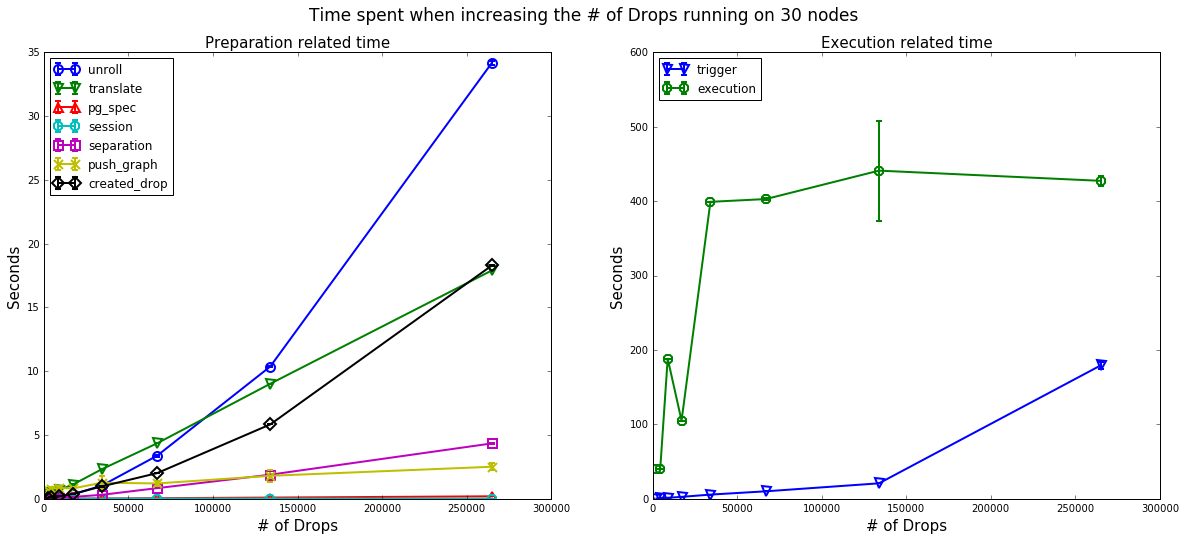

In [9]:
plot_time_vs_drops(30, pyro_time=False)

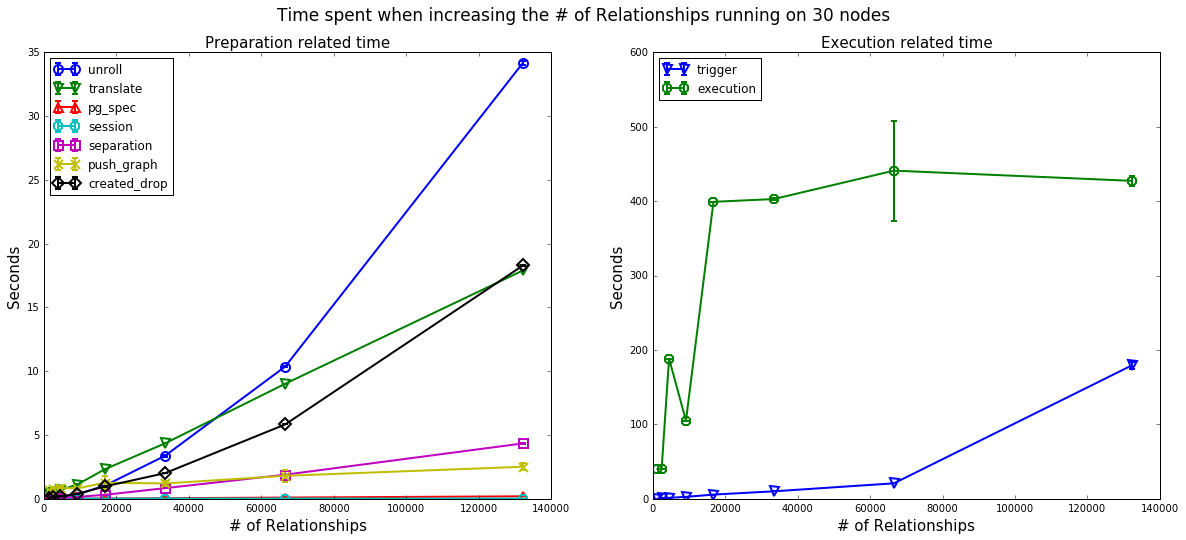

In [10]:
plot_time_vs_drops(30, x_axis='num_rel', pyro_time=False)

Now try 60 nodes...

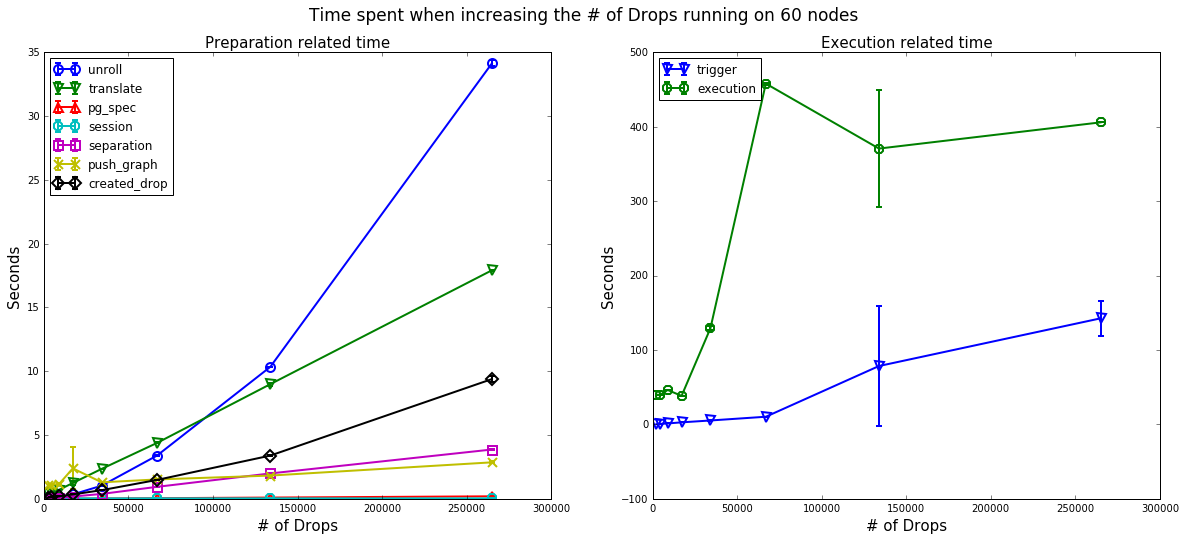

In [11]:
plot_time_vs_drops(60, pyro_time=False)

Then try increasing the number of relationships (instead of # of Drops) running on 60 nodes

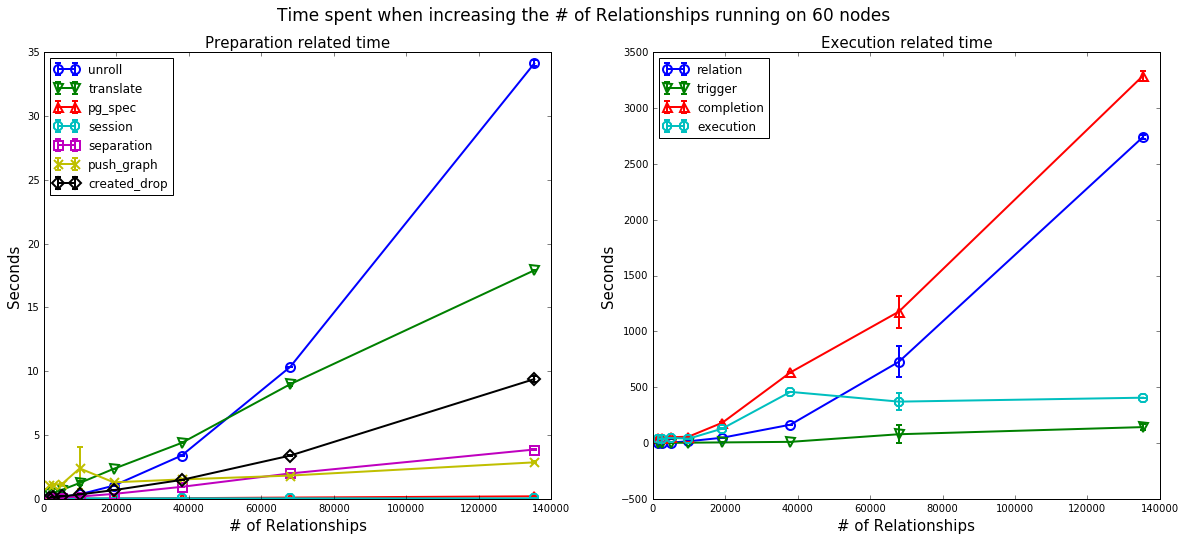

In [12]:
plot_time_vs_drops(60, x_axis='num_rel')

## Plot 2
The association between # of Drops and # of Relationships under different # of Nodes

In [13]:
def plot_rel_vs_drops(num_nodes=[]):
    markers = itertools.cycle((',', '+', '.', 'o', '*'))
    for nn in num_nodes:
        run = df[(df[4] == nn) & (df[14] != -1)].sort_values(by=[5, 14])
        x = run.ix[:, 5].values
        y = run.ix[:, 14].values
        ls = plt.plot(x, y, label='{0} nodes'.format(nn), marker=markers.next(), 
                 markersize=10, markeredgewidth=2, markerfacecolor='none', linewidth=2)
        ls[0].set_markeredgecolor(ls[0].get_color())
    plt.ylabel('# of Relationships', fontsize=15)
    plt.xlabel('# of Drops', fontsize=15)
    plt.legend(loc='upper left', fontsize=15)

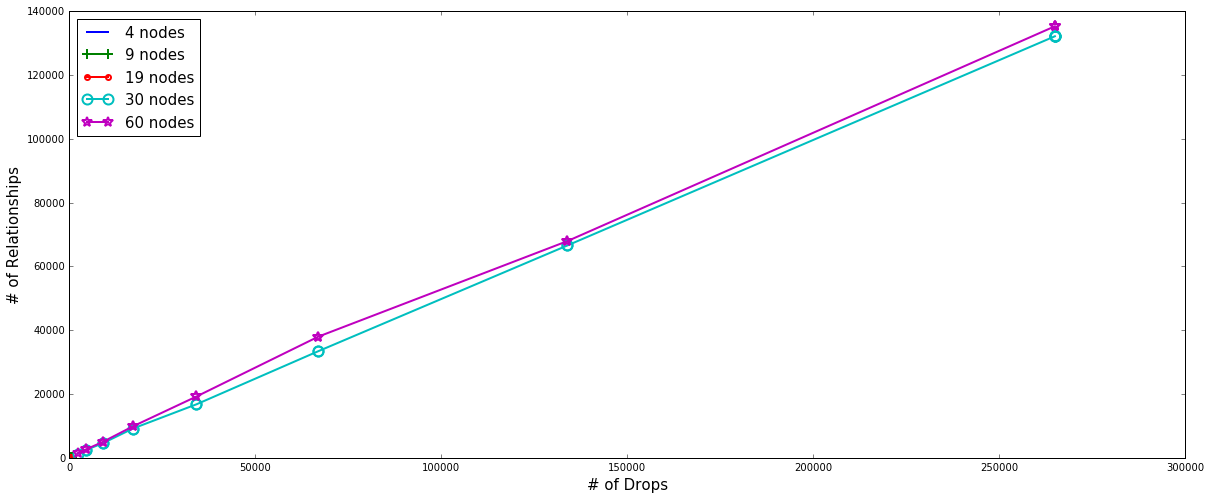

In [14]:
plot_rel_vs_drops(num_nodes=[4,9,19,30,60])

## Plot 3
the time spend on varoius metrics when we increase the # of nodes given a fixed set of Drops. Since the level of # of nodes is not so many, it is best to use a bar chart to illustrate this.

In [15]:
gby_nodes = df[(df[14] != -1) & (df[17] != -1) & (df[16] != 'None')].groupby(4) # group by # of nodes
gby_nodes.groups

{25: [49],
 30: [0, 3, 5, 6, 8, 11, 13, 14, 20, 25, 27, 30, 31, 43, 47],
 50: [9],
 60: [2, 7, 12, 16, 17, 22, 23, 24, 29, 33, 34, 35, 36, 37, 40, 44]}

In [16]:
#df30 = df.iloc[gby_nodes.groups[30]][[5, 17]]
df30 = df.iloc[gby_nodes.groups[30]][[5, 15, 16, 17]]

In [17]:
#df60 = df.iloc[gby_nodes.groups[60]][[5, 17]]
df60 = df.iloc[gby_nodes.groups[60]][[5, 15, 16, 17]]

In [18]:
#df30_1 = pd.DataFrame({'17_30': list(df30[[17]].values.flatten())}, index=list(df30[[5]].values[:,0]))
dt1 = df30[17].astype(float) - df30[16].astype(float) - df30[15].astype(float)
df30_1 = pd.DataFrame({'17_30': list(dt1)}, index=list(df30[[5]].values[:,0]))
df30_1

,17_30
133830,491.163
17078,104.976
66918,400.772
66918,404.985
8886,188.482
264902,426.482
34150,399.098
8886,188.334
34150,399.222
17078,105.059


In [19]:
#df60_1 = pd.DataFrame({'17_60': list(df60[[17]].values.flatten())}, index=list(df60[[5]].values[:,0]))
dt2 = df60[17].astype(float) - df60[16].astype(float) - df60[15].astype(float)
df60_1 = pd.DataFrame({'17_60': list(dt2)}, index=list(df60[[5]].values[:,0]))
df60_1

,17_60
8886,46.260
264902,400.680
264902,403.452
133830,425.935
4446,39.608
34150,127.253
17078,38.263
2226,39.816
66918,456.802
8886,46.268


In [20]:
both_df_t = df30_1.join(df60_1).sort_index()
both_df = both_df_t.groupby(both_df_t.index).mean()
both_df_err = both_df_t.groupby(both_df_t.index).std()
both_df_err

,17_30,17_60
2226,NaN,NaN
4446,0.004619,0.001155
8886,0.085448,0.004619
17078,0.047920,0.072746
34150,0.071591,2.217025
66918,2.432377,1.455500
133830,57.815856,63.733696
264902,0.984805,6.165193


In [21]:
both_df

,17_30,17_60
2226,40.1150,39.816000
4446,39.6520,39.609000
8886,188.4080,46.264000
17078,105.0175,38.326000
34150,399.1600,129.173000
66918,402.8785,458.062500
133830,441.0930,370.740000
264902,427.3810,405.964333


In [22]:
nodes_30 = both_df[['17_30']].values.flatten()
nodes_30_err = both_df_err[['17_30']].values.flatten()

In [23]:
nodes_60 = both_df[['17_60']].values.flatten()
nodes_60_err = both_df_err[['17_60']].values.flatten()

In [24]:
x_tick_labels = [str(x) + ' Drops' for x in sorted(both_df.index.values)]
x_tick_labels

['2226 Drops',
 '4446 Drops',
 '8886 Drops',
 '17078 Drops',
 '34150 Drops',
 '66918 Drops',
 '133830 Drops',
 '264902 Drops']

In [25]:
N = len(nodes_30)

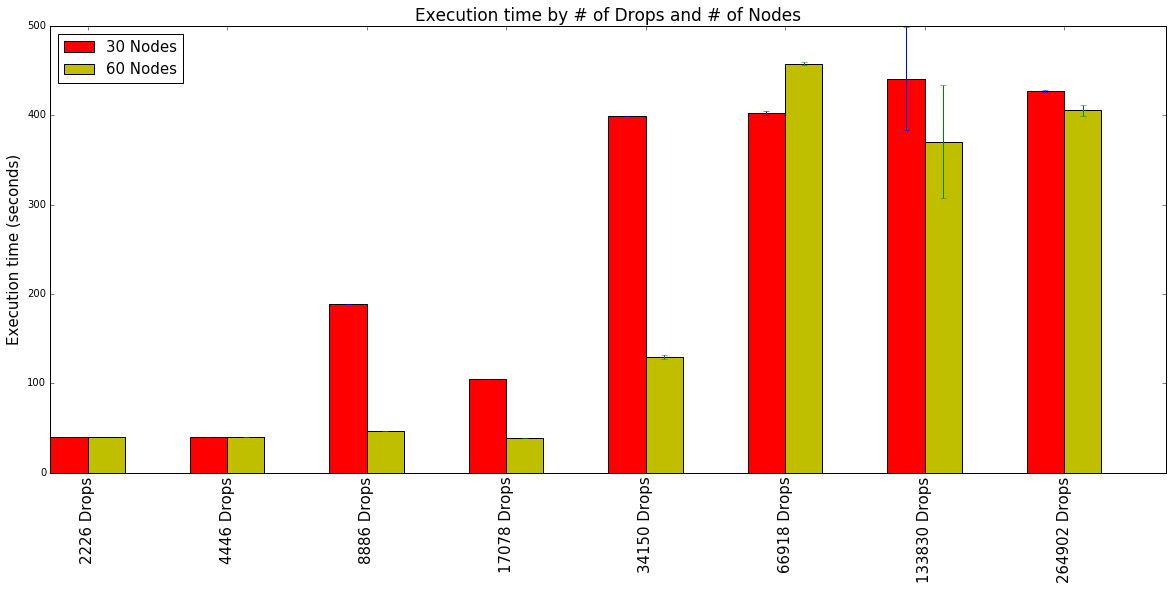

In [26]:
width = 0.4
ind = np.arange(N) * 1.5
b1 = plt.bar(ind, nodes_30, width, color='r', yerr=nodes_30_err)
b2 = plt.bar(ind + width, nodes_60, width, color='y', yerr=nodes_60_err)
plt.xticks(ind + width, x_tick_labels, fontsize=15, rotation='vertical')
plt.ylabel('Execution time (seconds)', fontsize=15)
plt.title('Execution time by # of Drops and # of Nodes', fontsize=17)
plt.legend((b1, b2), ('30 Nodes', '60 Nodes'), loc='upper left', fontsize=15)